# 1. Install Dependencies and Setup

In [48]:
import tensorflow as tf
import os

In [49]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [50]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [51]:
import cv2
import imghdr

In [52]:
data_dir = 'data' 

In [53]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [54]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data\driving\drivingCarPosture-497861812-770x553.jpg
Image not in ext list data\driving\v4-460px-Drive-a-Car-Step-27.jpg.webp
Image not in ext list data\driving\vector.svg
Image not in ext list data\driving\vector10.svg
Image not in ext list data\driving\vector11.svg
Image not in ext list data\driving\vector12.svg
Image not in ext list data\driving\vector13.svg
Image not in ext list data\driving\vector2.svg
Image not in ext list data\driving\vector3.svg
Image not in ext list data\driving\vector4.svg
Image not in ext list data\driving\vector5.svg
Image not in ext list data\driving\vector6.svg
Image not in ext list data\driving\vector7.svg
Image not in ext list data\driving\vector8.svg
Image not in ext list data\driving\vector9.svg
Image not in ext list data\drowzy\110518_drowsy_driving.jpg
Image not in ext list data\drowzy\17877341.jpg
Image not in ext list data\drowzy\drowsy-driving-1-2.webp
Image not in ext list data\drowzy\drowsy-driving-and-sleep-apnea-betterni

# 3. Load Data

In [55]:
import numpy as np
from matplotlib import pyplot as plt

In [56]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 430 files belonging to 2 classes.


In [57]:
data_iterator = data.as_numpy_iterator()

In [58]:
batch = data_iterator.next()

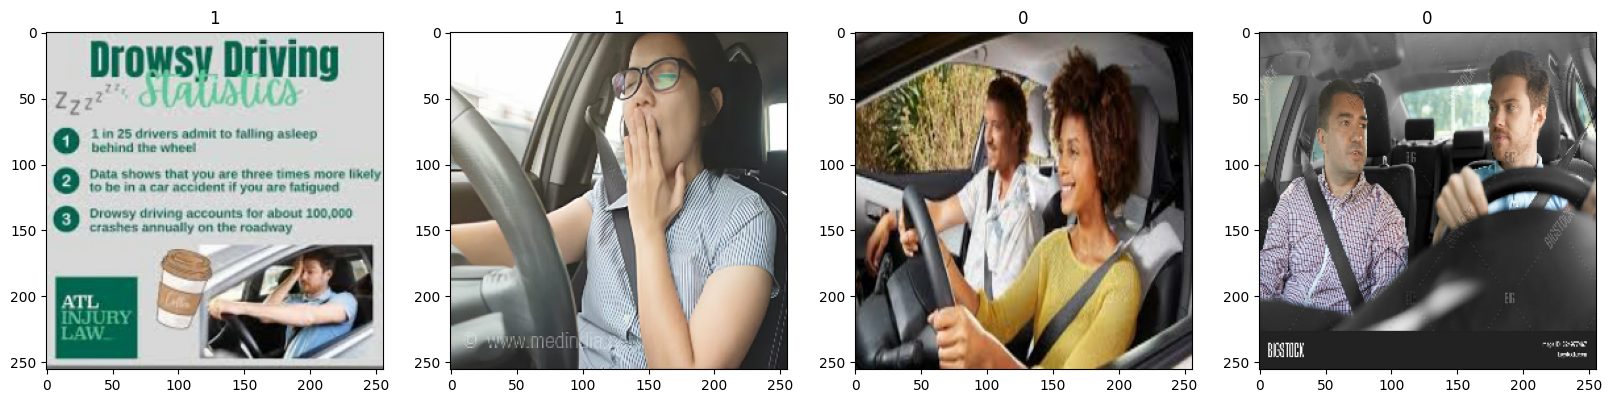

In [59]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [60]:
data = data.map(lambda x,y: (x/255, y))

In [61]:
data.as_numpy_iterator().next()

(array([[[[0.02352941, 0.03921569, 0.04313726],
          [0.02218137, 0.03786765, 0.04178922],
          [0.01605392, 0.0317402 , 0.03566176],
          ...,
          [0.43492648, 0.4819853 , 0.46629903],
          [0.42879903, 0.47585785, 0.46017158],
          [0.42745098, 0.4745098 , 0.45882353]],
 
         [[0.02352941, 0.03921569, 0.04313726],
          [0.0222393 , 0.03783869, 0.04178922],
          [0.01637513, 0.03157959, 0.03566176],
          ...,
          [0.47503063, 0.52192885, 0.5062426 ],
          [0.46890318, 0.51593304, 0.50024676],
          [0.46755514, 0.514614  , 0.49892768]],
 
         [[0.02352941, 0.03921569, 0.04313726],
          [0.02250258, 0.03770704, 0.04178922],
          [0.01783519, 0.03084956, 0.03566176],
          ...,
          [0.6573223 , 0.7034905 , 0.6878042 ],
          [0.6511949 , 0.69809306, 0.6824068 ],
          [0.6498468 , 0.6969056 , 0.68121934]],
 
         ...,
 
         [[0.10980392, 0.12941177, 0.14117648],
          [0.10980

# 5. Split Data

In [62]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [63]:
train_size

9

In [64]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [65]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [67]:
model = Sequential()

In [68]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [69]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [70]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [71]:
logdir='logs'

In [72]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [73]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 794ms/step - accuracy: 0.5028 - loss: 0.9162 - val_accuracy: 0.5469 - val_loss: 0.6703
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 744ms/step - accuracy: 0.5788 - loss: 0.6640 - val_accuracy: 0.7812 - val_loss: 0.6171
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 636ms/step - accuracy: 0.7305 - loss: 0.6144 - val_accuracy: 0.7500 - val_loss: 0.5403
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 706ms/step - accuracy: 0.7519 - loss: 0.5082 - val_accuracy: 0.8594 - val_loss: 0.3897
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 729ms/step - accuracy: 0.7251 - loss: 0.4970 - val_accuracy: 0.6094 - val_loss: 0.5650
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 719ms/step - accuracy: 0.7427 - loss: 0.5134 - val_accuracy: 0.7500 - val_loss: 0.5251
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 700ms/step - accuracy: 0.8238 - loss: 0.4301 - val_accuracy: 0.9375 - val_loss: 0.3004
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 748ms/step - accuracy: 0.8280 - loss: 0.3888 - val_accuracy: 0.8438 - val_loss: 0.3751
Ep

# 8. Plot Performance

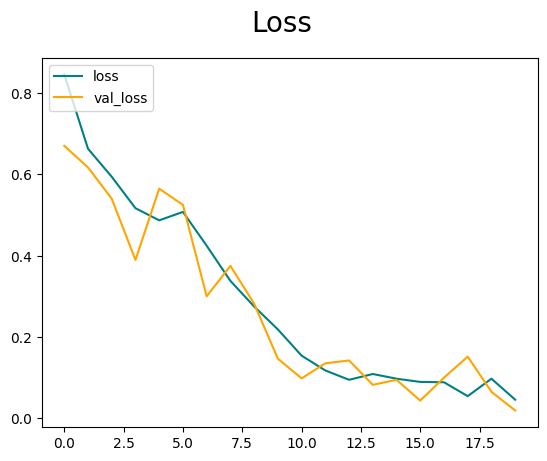

In [74]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

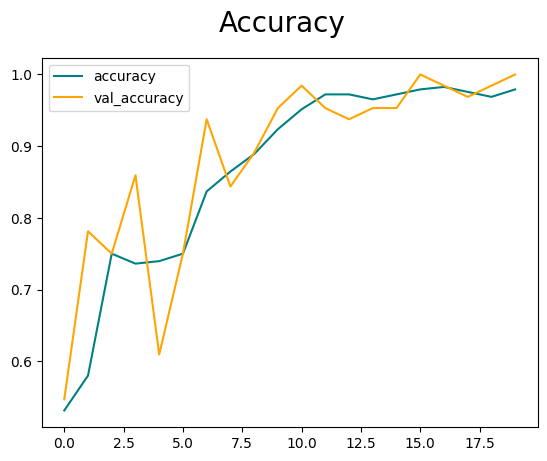

In [75]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [76]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [77]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [78]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


In [79]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [80]:
import cv2

# 10. Test

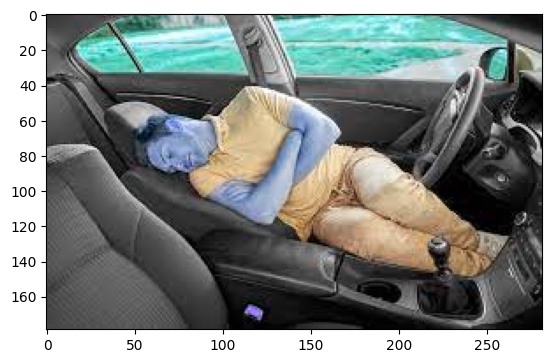

In [95]:
img = cv2.imread('7760316.jpeg')
plt.imshow(img)
plt.show()

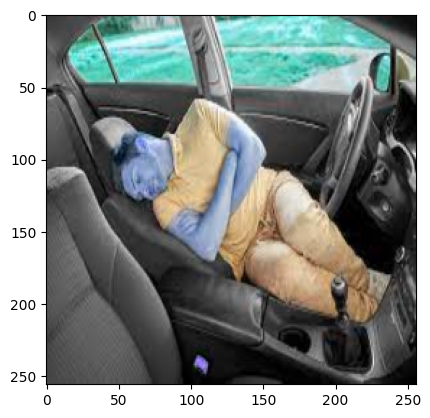

In [96]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [97]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


In [98]:
yhat

array([[0.99639505]], dtype=float32)

In [99]:
if yhat > 0.5: 
    print(f'Predicted class is drowsy')
else:
    print(f'Predicted class is not drowsy')

Predicted class is drowsy
